<a href="https://colab.research.google.com/github/mimilazarova/DD2424-covid-xray-project/blob/master/playground_colab_diego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from sklearn.metrics import confusion_matrix


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

with open('/content/drive/My Drive/DD2424_Project/data/trainX1.pickle', 'rb') as f:
  X1 = pickle.load(f)
with open('/content/drive/My Drive/DD2424_Project/data/trainX2.pickle', 'rb') as f:
  X2 = pickle.load(f)

trainX = np.concatenate((X1, X2))

with open('/content/drive/My Drive/DD2424_Project/data/testX.pickle', 'rb') as f:
  testX = pickle.load(f)
with open('/content/drive/My Drive/DD2424_Project/data/train_y.pickle', 'rb') as f:
  train_y = pickle.load(f)
with open('/content/drive/My Drive/DD2424_Project/data/test_y.pickle', 'rb') as f:
  test_y = pickle.load(f)

trainX.shape
train_y.shape
testX.shape
test_y.shape

In [0]:
class_weights = {}
for c in range(3):
  class_weights[c] = 1000/np.sum(train_y==c)
  print(class_weights[c])


0.12553351744915892
0.183452577508714
4.484304932735426


In [0]:
N = trainX.shape[0]
testN = testX.shape[0]

trainX = trainX.reshape((N, 224, 224, 1))
trainX.shape

(13640, 224, 224, 1)

In [0]:
testX = testX.reshape((testN, 224, 224, 1))
testX.shape

(1510, 224, 224, 1)

In [0]:
model1 = keras.models.Sequential()
model1.add(layers.Conv2D(64, (5, 5), padding = 'same', activation='relu', input_shape=(224, 224, 1)))
model1.add(layers.MaxPooling2D((4, 4)))
model1.add(layers.Conv2D(64, (5, 5), padding = 'same', activation='relu'))
model1.add(layers.MaxPooling2D((4, 4)))
model1.add(layers.Conv2D(64, (5, 5), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(10, activation='relu'))
model1.add(layers.Dense(3))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        102464    
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

In [0]:
model1.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

history1 = model1.fit(trainX, train_y, epochs=5, 
                    validation_data=(testX, test_y))

Epoch 1/5
427/427 [==============================] - 11s 26ms/step - loss: 0.5625 - accuracy: 0.7852 - val_loss: 0.4988 - val_accuracy: 0.8298
Epoch 2/5
427/427 [==============================] - 11s 25ms/step - loss: 0.4336 - accuracy: 0.8372 - val_loss: 0.3947 - val_accuracy: 0.8563
Epoch 3/5
427/427 [==============================] - 11s 26ms/step - loss: 0.4004 - accuracy: 0.8502 - val_loss: 0.3547 - val_accuracy: 0.8656
Epoch 4/5
427/427 [==============================] - 11s 26ms/step - loss: 0.3517 - accuracy: 0.8710 - val_loss: 0.3156 - val_accuracy: 0.8874
Epoch 5/5
427/427 [==============================] - 11s 25ms/step - loss: 0.3337 - accuracy: 0.8769 - val_loss: 0.3059 - val_accuracy: 0.8854


In [0]:
model1 = keras.models.Sequential()
model1.add(layers.Conv2D(64, (5, 5), padding = 'same', activation='relu', input_shape=(224, 224, 1)))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((4, 4)))
model1.add(layers.Conv2D(64, (5, 5), padding = 'same', activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((4, 4)))
model1.add(layers.Conv2D(64, (5, 5), activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(10, activation='relu'))
model1.add(layers.Dense(3))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 64)      1664      
_________________________________________________________________
batch_normalization_7 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 64)        102464    
_________________________________________________________________
batch_normalization_8 (Batch (None, 56, 56, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 64)       

In [0]:
model1.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

history1 = model1.fit(trainX, train_y, epochs=5, 
                    validation_data=(testX, test_y))

Epoch 1/5
427/427 [==============================] - 15s 34ms/step - loss: 0.4462 - accuracy: 0.8279 - val_loss: 0.4054 - val_accuracy: 0.8450
Epoch 2/5
427/427 [==============================] - 15s 34ms/step - loss: 0.3489 - accuracy: 0.8673 - val_loss: 0.4499 - val_accuracy: 0.8033
Epoch 3/5
427/427 [==============================] - 14s 34ms/step - loss: 0.3133 - accuracy: 0.8838 - val_loss: 0.4302 - val_accuracy: 0.8477
Epoch 4/5
427/427 [==============================] - 14s 34ms/step - loss: 0.2936 - accuracy: 0.8901 - val_loss: 0.3570 - val_accuracy: 0.8801
Epoch 5/5
427/427 [==============================] - 15s 34ms/step - loss: 0.2658 - accuracy: 0.9000 - val_loss: 0.5607 - val_accuracy: 0.7735


In [0]:
def make_model():
  model = keras.models.Sequential()
  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(224,224,1)))
  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
    
  model.add(layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu', strides=1, padding='same'))

  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation='relu'))
  model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  model.add(layers.Dense(16, activation='relu'))
  model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  model.add(layers.Dense(3))
  return model

In [0]:

model1 = make_model()
model1.summary()

# optimizer = tf.keras.optimizers.Adam (lr=0.001)

model1.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

# reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

history1 = model1.fit(trainX, train_y, epochs=5, 
                    # validation_data=(testX, test_y), callbacks=[reduce_lr])
                    validation_data=(testX, test_y))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 224, 224, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 128)    

Confusion matrix:
[[716 163   6]
 [ 43 549   2]
 [  5   6  20]]


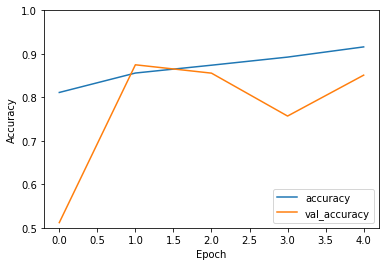

In [0]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_y_pred_m = model1.predict(testX)
test_y_pred1 = np.argmax(test_y_pred_m, axis=1)

conf_matrix = confusion_matrix(test_y, test_y_pred1, labels=[0, 1, 2])
print("Confusion matrix:")
print(conf_matrix)

In [0]:
np.argmax(test_y_pred_m, axis=1)

array([1, 1, 1, ..., 1, 1, 1])